# Project 2: Transistors and Amplifiers

This project will introduce two basic techniques for using currents and voltages to control currents and voltages. Why would you want to do that? It turns out that many times the physical system we're working with is not *directly* compatable with the tools we have to control or measure that system. For example, suppose we want to control the temperature of an experiment. It turns out there are materials with properties that depend on temperature (e.g., resistance, band gap voltage, and so on). If we can somehow turn those properties into electrical signals, we can use those signals to infer the temperature of the system. The bad news is that those signals are usually *not* a voltage from 0-5V that can simply be connected to the Arduino for measurement. We often (most of the time!) need to process those electrical signals in order to get something that an Arduino can measure. That's where amplifiers can be extremely handy. A transistor is, sort of, the worlds simplest example of a crude, but effective, amplifier. *So* first we'll learn how a transistor works, and then we'll jump straight to an operational amplifier (which is really just a complex circuit, containing many transistors, so that it does the job much more effectively).

## The NPN Biploar Junction Transistor (BJT)

The schematic symbol for an NPN [Bipolar Junction Transistor (BJT)](https://en.wikipedia.org/wiki/Bipolar_junction_transistor) looks like this:

![BJT](proj2-npn-trans-only.png)

The pins are called 1) Emitter, 2) Base, 3) Collector. You can generally think of the Base-Emitter (BE) as a diode (hence the little diode symbol embedded in the picture). The BE diode obeys the Shockley equation over the range of currents and voltages we're goign to be using. The magic comes when we look at the behavior of the CE connection. It turns out the current through the CE junction is *proportional* to the current through the BE junction. The proportionality constant is called the *current* *gain* $\beta$.

$$ I_{ce} = \beta I_{be} $$

What's the use? Because $\beta$ can be a large number (think 20 or 50) a small change in $I_{be}$ can produce a large change in $I_{ce}$ which means signals can be *amplified*.

The first thing we need to do is to set up a transistor to mesure $\beta$ and see how that works. Set up the following circuit. For this one, you can re-use the same RC circuit on the PWM output of the Arduino that you used last time. Suppose the max current through the BE junction should be $0.5\ {\rm mA}$ and the max current through the CE junction should be $10\ {\rm mA}$. Roughly, how big should R2 and R3 be in this case?

![NPN + Arduino](proj2-npn-trans-arduino.png)



In [2]:
#
# Load up some packages
#
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd

# Estimate $\beta$

Now run an experiment similar to last week's project but this time collect data to estiamate $\beta$. There should be a range of $I_{be}$ values in which $I_{ce}$ is increasing proportionally. Identify this region, and use the data you collect to estimate $\beta$. You'll be given a transistor. Look up the *pinout* of the transistor you're given and make sure you connect it as shown in the schematic diagram. If you have questions, please *ask*!

# Operational Amplifiers

Next we're going to learn about the behavior of *operational* *amplifiers* (or "opamp"). An operational amplifier is simply a collection of transistors designed to multiply the difference between two input voltages by a large constant factor (called the "open loop gain") and set the output voltage to the result of this "operation":

$$V_{\rm out} = G(V_+ - V_-)$$

The schematic diagram below shows the internal plumbing of the TI version of one unit of the LM324 opamp:

![TI Internals](929902.png)

$$\text{One unit of the popular TI LM324}$$

You can see that there are *lots* of transistors involved. We're going to construct a simple "2x" multiplier using the opamp as a tool in our toolkit to make it work. Let's use the same PWM output to produce a crude, but effective "triangle" or "sawtooth" wave. What kind of signal do you expect if you dial the time constant down to something like 3x the period of the PWM signal? Try it, and see if your expectation is confirmed. Set the PWM output to a duty cycle of 20% (high 20% of the time, low 80% of the time). How can you get this duty cycle using the `analogWrite` function? What average output voltage do you expect at this setting? I've run an LTSpice model (triangle.asc) of this situation and stored the results in "triangle.csv". Once you've got the circuit set up you should be able to measure a signal like this on the capacitor of the RC circuit:

Text(0.5,1,'Steady State signal at Capacitor')

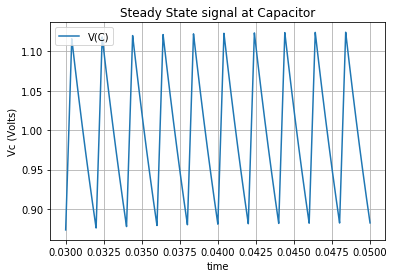

In [11]:
df=pd.read_csv('triangle.csv', sep='\t')
df[df['time']>0.03].plot('time','V(C)')
pl.grid()
pl.legend(loc=2)
pl.ylabel("Vc (Volts)")
pl.title("Steady State signal at Capacitor")

# Amplify this signal

Now, we'll use this sawtooth or triangle wave as an input to an amplifier with the idea of multiplying the voltage by a factor of 2. How? We'll use the LM324 again, but this time not as a *follower* but as an *amplifier*. The schematic symbol for an amplifier is a sideways isosceles triangle like so (This example is an [LM234](http://www.ti.com/lit/ds/symlink/lm124.pdf), but there are many brands and types of amplifiers):

![Amplifier](./amp-only.png)

The amplifier is designed to do whatever it can to make it's "+" and "-" inputs equal to one another. If the "+" is greater than the "-" the amplifier *increases* its output. It's up the to designer to set up the circuit so that this has the effect of lowering the difference of the "+" and "-" input. Similarly, if the "+" input is less than the "-" input the output of the amplifier *decreases* its output. The output keeps increasing or decreasing until either the output reaches a limit (positive or negative supply limits usually) or it is successful in making the two inputs nearly equal (within fractions of a millivolt). Consider the following circuit:

![Amplifier Circuit](./proj2-npn-arduino-amp.png)

As an example, suppose R3 is 10k and R2 is 1k. Suppose further than the voltage on the "+" input is 0.3V. What will the output of the amplifier have to be to make the two inputs equal. Will the recipe described in the preceding paragraph accomplish this? If you have trouble with this question, please ask! It's not hard, but it may take some practice to remember enough about your basic circuit physics to figure it out. Be patient, but don't give up! Ask if you have questions.

## Experiment

Now, design an amplifier circuit that will produce a gain of 2 using the circuit given above. Use the sawtooth waveform as an input, and use the Arduino to collect data and verify that the circuit does indeed have a gain of 2. You may need to use an array to store the data and send the data back after its been captured (see the example program from project 1 to get ideas about how this can be done). The waveform is changing too quickly to capture if you're printing every measurement as you collect the data. Store the measurements in an array and then dump the measurements to the computer after you've collected enough data. You can use the "flag" technique described below.

## flag technique

If you need to collect analog data very quickly (for signals that change over fractions of a millisec) you can't read the analog port and immediately send the value back to the computer. The problem is that sending data to the computer is a relatively slow process. In the time it takes to send the data from the last measuremnet you will have missed important data because the voltages would've already changed. In this case you need to *save* the data in an array, and once the measurements are over, iterate through the array and send the results back. Below is an example Arduino program that collects data in a tight loop. Once the data has been collected you can take your time to send it back.

    int flag = 0;        // set when data is collected
    const int N = 150;   // how many data points?

    int v[N];            // raw analogRead vals
    long times[N];       // times (microseconds)

    void setup()
    {
      pinMode(13, OUTPUT);
      pinMode(3,OUTPUT);
      Serial.begin(9600);
      analogWrite(3,127);
    }

    /*
    ** collectData iterates through the arrays and stores
    ** times and raw voltages as quickly as possible
    */

    void collectData() {
      for (int i=0; i<N; i++) {
        v[i]=analogRead(0);
        times[i]=micros();
      }
    }

    /*
    ** printData iterates through the arrays and prints the
    ** stored values back to the computer.
    */

    void printData() {
      Serial.println("t,v");
      for (int i=0; i<N; i++) {
        Serial.print(times[i]);
        Serial.print(",");
        Serial.println(v[i]);
      }
    }

    void loop()
    {
      if (flag==0) {
        collectData();
        printData();
        flag=1;
      } else {
        /*
        ** We got the data, just flash the LED now.
        */
        digitalWrite(13, HIGH);
        delay(1000); // Wait for 1000 millisecond(s)
        digitalWrite(13, LOW);
        delay(1000); // Wait for 1000 millisecond(s)
      }
    }
